In [1]:
'''
Run the graph embedding methods on Karate graph and evaluate them on 
graph reconstruction and visualization. Please copy the 
gem/data/karate.edgelist to the working directory
'''
import matplotlib.pyplot as plt
from time import time

from gem.utils      import graph_util, plot_util
from gem.evaluation import visualize_embedding as viz
from gem.evaluation import evaluate_graph_reconstruction as gr

from gem.embedding.gf       import GraphFactorization
from gem.embedding.hope     import HOPE
from gem.embedding.lap      import LaplacianEigenmaps
from gem.embedding.lle      import LocallyLinearEmbedding
from gem.embedding.node2vec import node2vec
from gem.embedding.sdne     import SDNE
from argparse import ArgumentParser

Using TensorFlow backend.
/home/ktoraman/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ktoraman/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ktoraman/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ktoraman/anaconda3/lib/python3.7/site-packag

In [2]:
run_n2v = False

# File that contains the edges. Format: source target
# Optionally, you can add weights as third column: source target weight
edge_f = 'data/karate.edgelist'
# Specify whether the edges are directed
isDirected = True

# Load graph
G = graph_util.loadGraphFromEdgeListTxt(edge_f, directed=isDirected)
G = G.to_directed()

In [7]:
models = []
# Load the models you want to run
# models.append(GraphFactorization(d=2, max_iter=50000, eta=1 * 10**-4, regu=1.0, data_set='karate'))
models.append(HOPE(d=4, beta=0.01))
models.append(LaplacianEigenmaps(d=2))
models.append(LocallyLinearEmbedding(d=2))
# models.append(
#     node2vec(d=2, max_iter=1, walk_len=80, num_walks=10, con_size=10, ret_p=1, inout_p=1)
# )
models.append(SDNE(d=2, beta=5, alpha=1e-5, nu1=1e-6, nu2=1e-6, K=3,n_units=[50, 15,], rho=0.3, n_iter=50, xeta=0.01,n_batch=100,
                modelfile=['enc_model.json', 'dec_model.json'],
                weightfile=['enc_weights.hdf5', 'dec_weights.hdf5']))

Num nodes: 34, num edges: 77
SVD error (low rank): 0.053622
hope_gsvd:
	Training time: 0.002675
	MAP: 0.13355014796338815 	 preccision curve: [1.0, 1.0, 0.6666666666666666, 0.5, 0.4]



----------------------------------------------------------------------------------------------------
Embedding dimension greater than 2, use tSNE to reduce it to 2


/home/ktoraman/anaconda3/lib/python3.7/site-packages/networkx-1.11-py3.7.egg/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/home/ktoraman/anaconda3/lib/python3.7/site-packages/networkx-1.11-py3.7.egg/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/home/ktoraman/anaconda3/lib/python3.7/site-packages/networkx-1.11-py3.7.egg/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):


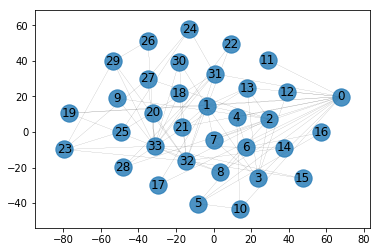

Num nodes: 34, num edges: 77
Laplacian matrix recon. error (low rank): 6.293280
lap_eigmap_svd:
	Training time: 0.004849
	MAP: 0.420547084646048 	 preccision curve: [0.0, 0.0, 0.0, 0.25, 0.2]



----------------------------------------------------------------------------------------------------


/home/ktoraman/anaconda3/lib/python3.7/site-packages/networkx-1.11-py3.7.egg/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/home/ktoraman/anaconda3/lib/python3.7/site-packages/networkx-1.11-py3.7.egg/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/home/ktoraman/anaconda3/lib/python3.7/site-packages/networkx-1.11-py3.7.egg/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):


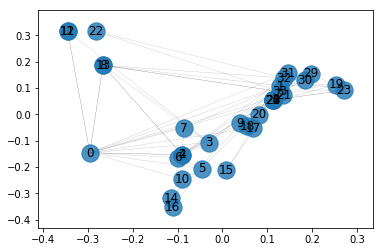

Num nodes: 34, num edges: 77
lle_svd:
	Training time: 0.009671
	MAP: 0.4529110995776896 	 preccision curve: [0.0, 0.0, 0.0, 0.25, 0.2]



----------------------------------------------------------------------------------------------------


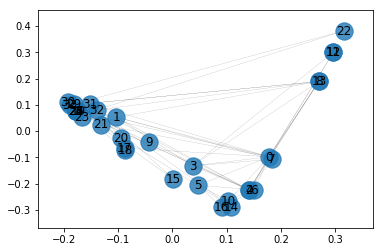

Num nodes: 34, num edges: 77


/home/ktoraman/anaconda3/lib/python3.7/site-packages/gem-1.0.0-py3.7.egg/gem/embedding/sdne_utils.py:71: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(50, activation="relu", kernel_regularizer=<keras.reg...)`
  W_regularizer=Reg.l1_l2(l1=nu1, l2=nu2))(y[i])
/home/ktoraman/anaconda3/lib/python3.7/site-packages/gem-1.0.0-py3.7.egg/gem/embedding/sdne_utils.py:71: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(15, activation="relu", kernel_regularizer=<keras.reg...)`
  W_regularizer=Reg.l1_l2(l1=nu1, l2=nu2))(y[i])
/home/ktoraman/anaconda3/lib/python3.7/site-packages/gem-1.0.0-py3.7.egg/gem/embedding/sdne_utils.py:73: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(2, activation="relu", kernel_regularizer=<keras.reg...)`
  W_regularizer=Reg.l1_l2(l1=nu1, l2=nu2))(y[K - 1])
/home/ktoraman/anaconda3/lib/python3.7/site-packages/gem-1.0.0-py3.7.egg/gem/embedding/sdne_utils.py:75: UserWarning: Update your `Model` call to the Keras 2 API: `Mo

Epoch 1/50
1/1 [==============================] - 0s - loss: 12.3919 - merge_4_loss: 6.1893 - merge_5_loss: 6.1984 - merge_6_loss: 8.1894e-04
Epoch 2/50
1/1 [==============================] - 0s - loss: 9.8068 - merge_4_loss: 4.9390 - merge_5_loss: 4.8636 - merge_6_loss: 0.0067
Epoch 3/50
1/1 [==============================] - 0s - loss: 6.3923 - merge_4_loss: 3.1534 - merge_5_loss: 3.2347 - merge_6_loss: 0.0168
Epoch 4/50
1/1 [==============================] - 0s - loss: 5.6050 - merge_4_loss: 2.7411 - merge_5_loss: 2.8597 - merge_6_loss: 0.0203
Epoch 5/50
1/1 [==============================] - 0s - loss: 5.8077 - merge_4_loss: 2.8838 - merge_5_loss: 2.9197 - merge_6_loss: 0.0261
Epoch 6/50
1/1 [==============================] - 0s - loss: 5.3850 - merge_4_loss: 2.6744 - merge_5_loss: 2.7064 - merge_6_loss: 0.0360
Epoch 7/50
1/1 [==============================] - 0s - loss: 4.9185 - merge_4_loss: 2.3760 - merge_5_loss: 2.5383 - merge_6_loss: 0.0437
Epoch 8/50
1/1 [====================

/home/ktoraman/anaconda3/lib/python3.7/site-packages/networkx-1.11-py3.7.egg/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/home/ktoraman/anaconda3/lib/python3.7/site-packages/networkx-1.11-py3.7.egg/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/home/ktoraman/anaconda3/lib/python3.7/site-packages/networkx-1.11-py3.7.egg/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):


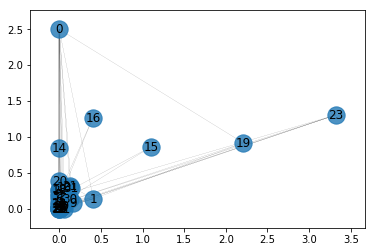

<Figure size 432x288 with 0 Axes>

In [8]:
# For each model, learn the embedding and evaluate on graph reconstruction and visualization
for embedding in models:
    print ('Num nodes: %d, num edges: %d' % (G.number_of_nodes(), G.number_of_edges()))
    t1 = time()
    # Learn embedding - accepts a networkx graph or file with edge list
    Y, t = embedding.learn_embedding(graph=G, edge_f=None, is_weighted=True, no_python=True)
    print (embedding._method_name+':\n\tTraining time: %f' % (time() - t1))
    # Evaluate on graph reconstruction
    MAP, prec_curv, err, err_baseline = gr.evaluateStaticGraphReconstruction(G, embedding, Y, None)
    #---------------------------------------------------------------------------------
    print(("\tMAP: {} \t preccision curve: {}\n\n\n\n"+'-'*100).format(MAP,prec_curv[:5]))
    #---------------------------------------------------------------------------------
    # Visualize
    viz.plot_embedding2D(embedding.get_embedding(), di_graph=G, node_colors=None)
    plt.show()
    plt.clf()